In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score

# Feature engine
from feature_engine.selection import SelectBySingleFeaturePerformance



### 5.1 Single Feature Model

#### 5.1.1 Classification

In [3]:
brest_cancer = load_breast_cancer()
X = pd.DataFrame(brest_cancer.data, columns = brest_cancer.feature_names)
y = brest_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
sel = SelectBySingleFeaturePerformance(
    estimator = DecisionTreeClassifier(),
    scoring = "roc_auc",
    cv = 3,
    threshold=None
)

sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=DecisionTreeClassifier())

In [6]:
sel.features_to_drop_

['mean texture',
 'mean smoothness',
 'mean symmetry',
 'mean fractal dimension',
 'texture error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst texture',
 'worst smoothness',
 'worst symmetry',
 'worst fractal dimension']

In [7]:
sel.feature_performance_

{'mean radius': 0.8051021129248817,
 'mean texture': 0.603808918097661,
 'mean perimeter': 0.8171860645890751,
 'mean area': 0.8124867500529999,
 'mean smoothness': 0.6064235743057028,
 'mean compactness': 0.7132004805314112,
 'mean concavity': 0.7906155042046499,
 'mean concave points': 0.8486679386615789,
 'mean symmetry': 0.5672037311850753,
 'mean fractal dimension': 0.5348031941205569,
 'radius error': 0.7361317221397782,
 'texture error': 0.48441806232775075,
 'perimeter error': 0.7451416860999224,
 'area error': 0.7631262808282101,
 'smoothness error': 0.5168539325842696,
 'compactness error': 0.5755423644972087,
 'concavity error': 0.6033142534096531,
 'concave points error': 0.6228181753939651,
 'symmetry error': 0.5144512755282312,
 'fractal dimension error': 0.553812451416861,
 'worst radius': 0.8500459331496008,
 'worst texture': 0.6172708642498764,
 'worst perimeter': 0.8922337643982757,
 'worst area': 0.8529079217016465,
 'worst smoothness': 0.5829623348173274,
 'worst co

Text(0.5, 1.0, 'Univariate performance')

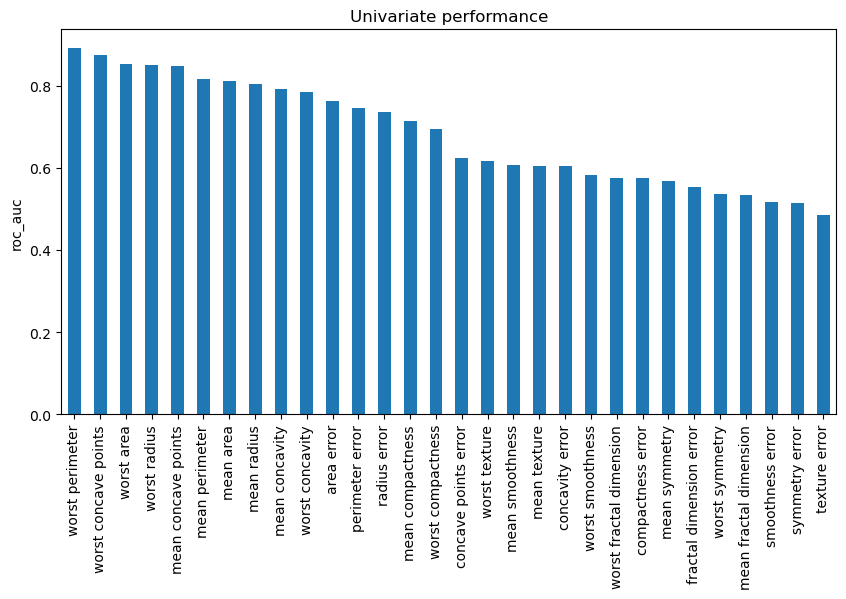

In [8]:
pd.Series(sel.feature_performance_).sort_values(ascending = False).plot.bar(figsize = (10,5))
plt.ylabel("roc_auc")
plt.title("Univariate performance")

In [9]:
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

In [10]:
X_train_t.head()

,mean radius,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
293,11.85,75.54,432.7,0.05642,0.026880,0.022800,0.2070,1.234,13.88,13.06,84.35,517.8,0.17580,0.13160,0.09140
332,11.22,71.94,387.3,0.06779,0.005006,0.007583,0.2976,1.959,19.62,11.98,76.91,436.1,0.09669,0.01335,0.02022
565,20.13,131.20,1261.0,0.10340,0.144000,0.097910,0.7655,5.203,99.04,23.69,155.00,1731.0,0.19220,0.32150,0.16280
278,13.59,86.24,572.3,0.04052,0.019970,0.012380,0.2580,1.683,22.22,15.50,98.91,739.1,0.07622,0.10600,0.05185
489,16.69,107.10,857.6,0.07112,0.036490,0.023070,0.2473,1.775,22.95,19.18,127.30,1084.0,0.29200,0.24770,0.08737


##### 5.1.2 Regression 

In [11]:

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sel = SelectBySingleFeaturePerformance(
    estimator = DecisionTreeRegressor(),
    scoring = "neg_mean_squared_error",
    cv = 3,
    threshold=None
)

sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=DecisionTreeRegressor(),
                                 scoring='neg_mean_squared_error')

In [12]:
sel.features_to_drop_

['AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [13]:
sel.feature_performance_

{'MedInc': -1.1638312651422595,
 'HouseAge': -1.3011775170158721,
 'AveRooms': -2.2115774276173155,
 'AveBedrms': -2.433540073677058,
 'Population': -1.781805666263966,
 'AveOccup': -2.428903818636949,
 'Latitude': -1.0544119957739533,
 'Longitude': -0.9774259364133907}

Text(0.5, 1.0, 'Univariate performance')

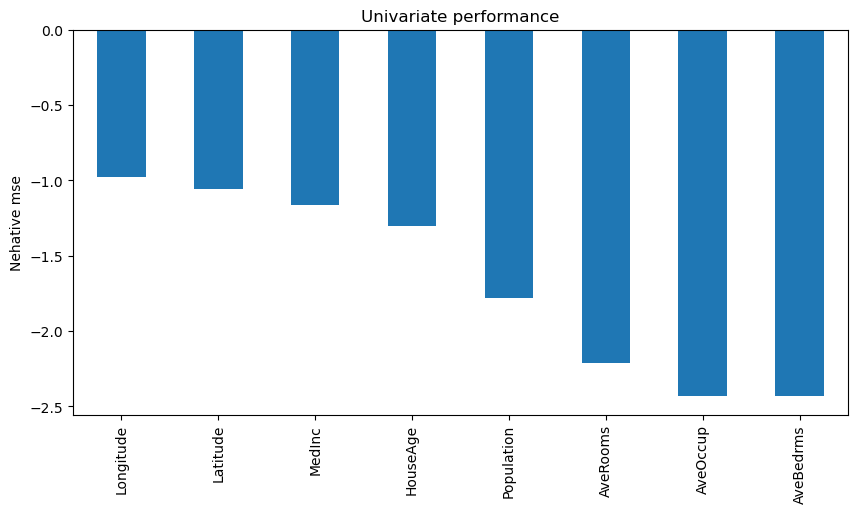

In [14]:
pd.Series(sel.feature_performance_).sort_values(ascending = False).plot.bar(figsize = (10,5))
plt.ylabel("Nehative mse")
plt.title("Univariate performance")

In [15]:
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.head()

,MedInc,HouseAge,Latitude,Longitude
19226,7.3003,19.0,38.46,-122.68
14549,5.9547,18.0,32.95,-117.24
9093,3.2125,19.0,34.68,-118.27
12213,6.9930,13.0,33.51,-117.18
12765,2.5162,21.0,38.62,-121.41


### 5.2 Target Encoding

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score

# Feature engine
from feature_engine.selection import SelectByTargetMeanPerformance
from feature_engine.encoding import RareLabelEncoder


In [17]:
variables = ["pclass", "survived", 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked']

data = pd.read_csv("https://www.openml.org/data/get_csv/16826755/phpMYEKM1",
                   usecols = variables,
                   na_values="?")
data.dropna(subset = ["embarked", 'fare'], inplace = True)
data['age'] = data['age'].fillna(data['age'].mean())

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return 'N'
    
data['cabin'] = data['cabin'].apply(get_first_cabin).str[0]
encoder = RareLabelEncoder(variables = "cabin", n_categories=2)
data = encoder.fit_transform(data)
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,female,29.0000,0,0,211.3375,Rare,S
1,1,1,male,0.9167,1,2,151.5500,C,S
2,1,0,female,2.0000,1,2,151.5500,C,S
3,1,0,male,30.0000,1,2,151.5500,C,S
4,1,0,female,25.0000,1,2,151.5500,C,S


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['survived'], axis = 1),
    data['survived'],
    test_size = 0.3,
    random_state = 0
)

In [19]:
sel = SelectByTargetMeanPerformance(
    bins = 5,
    strategy="equal_frequency",
    scoring = "roc_auc",
    cv =2,
    threshold=None,
    regression=False
)

In [21]:
sel.fit(X_train, y_train)
sel.features_to_drop_

['age', 'sibsp', 'parch', 'embarked']

In [24]:
sel.get_feature_names_out()

['pclass', 'sex', 'fare', 'cabin']

In [22]:
sel.feature_performance_

{'pclass': 0.6551893232380663,
 'sex': 0.7491001943282519,
 'age': 0.5382483653274581,
 'sibsp': 0.5183970828336429,
 'parch': 0.5068146044866522,
 'fare': 0.6753892717910286,
 'cabin': 0.6385761238147736,
 'embarked': 0.5630695122556864}

Text(0.5, 1.0, 'Features performance by target mean encoding')

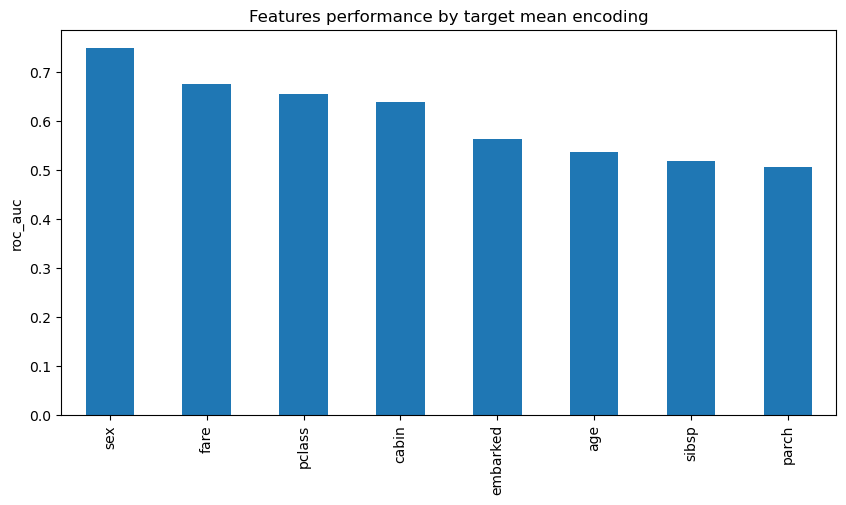

In [25]:
pd.Series(sel.feature_performance_).sort_values(ascending = False).plot.bar(figsize = (10,5))
plt.ylabel("roc_auc")
plt.title("Features performance by target mean encoding")

In [26]:
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.head()

,pclass,sex,fare,cabin
842,3,male,19.9667,N
868,3,male,6.4500,N
429,2,male,13.0000,N
480,2,male,41.5792,N
1308,3,male,7.8750,N
